In [1]:
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

import seaborn as sns #sets up styles and gives us more plotting optionsimport numpy as np


In [2]:
Newton=pd.read_csv("redfin_Newton2020Dec-1.csv", error_bad_lines=False) 

/Users/muskan/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
nums = Newton.select_dtypes(include=['int64','float64'])
z = Newton.LOT_SIZE<50000
numsc = nums[z]

In [4]:
Newton.head().shape

(5, 27)

In [5]:
nums.head(5)

,ZIP_OR_POSTAL_CODE,PRICE,BEDS,BATHS,SQUARE_FEET,LOT_SIZE,YEAR_BUILT,DAYS_ON_MARKET,Per_SQUARE_FEET,HOA_MONTH,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,MLS#,LATITUDE,LONGITUDE
0,2459,1090000,3,3.0,2969,15014,1967,19,367,NaN,NaN,NaN,72723436,42.295733,-71.177180
1,2460,805000,3,2.5,1566,5582,1922,29,514,NaN,NaN,NaN,72721482,42.362241,-71.208741
2,2458,905000,4,2.5,2532,6273,1953,19,357,NaN,NaN,NaN,72734897,42.345765,-71.175741
3,2458,2660000,7,4.5,6748,26607,1902,6,394,NaN,NaN,NaN,72623790,42.348963,-71.187043
4,2460,1925000,4,4.0,4200,20446,2007,2,458,NaN,NaN,NaN,72752876,42.349326,-71.212082


In [6]:
numsc.head()

,ZIP_OR_POSTAL_CODE,PRICE,BEDS,BATHS,SQUARE_FEET,LOT_SIZE,YEAR_BUILT,DAYS_ON_MARKET,Per_SQUARE_FEET,HOA_MONTH,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,MLS#,LATITUDE,LONGITUDE
0,2459,1090000,3,3.0,2969,15014,1967,19,367,NaN,NaN,NaN,72723436,42.295733,-71.177180
1,2460,805000,3,2.5,1566,5582,1922,29,514,NaN,NaN,NaN,72721482,42.362241,-71.208741
2,2458,905000,4,2.5,2532,6273,1953,19,357,NaN,NaN,NaN,72734897,42.345765,-71.175741
3,2458,2660000,7,4.5,6748,26607,1902,6,394,NaN,NaN,NaN,72623790,42.348963,-71.187043
4,2460,1925000,4,4.0,4200,20446,2007,2,458,NaN,NaN,NaN,72752876,42.349326,-71.212082


## Use sklearn to import linear_model

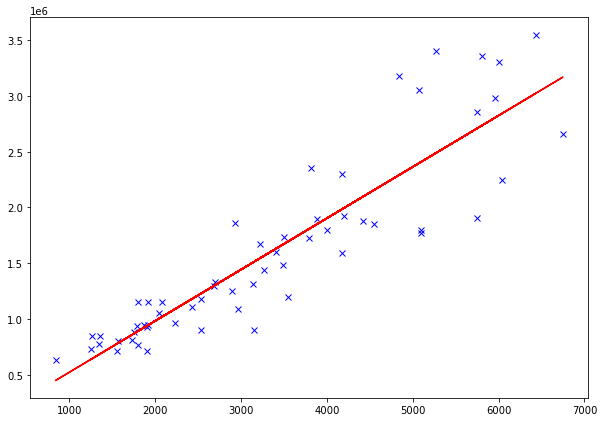

In [7]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 

linear_regressor = LinearRegression()  # create object for the class
X=numsc.SQUARE_FEET.values.reshape(-1, 1)
Y=numsc.PRICE.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
#plt.scatter(X, Y, color='Blue')
fig, ax = plt.subplots()

ax.plot(X,Y,'x',color='Blue')
plt.plot(X, Y_pred, color='red')
fig.set_size_inches(10, 7) 
plt.show()

In [8]:
reg =linear_regressor.fit(X, Y)
print(reg.intercept_)
print(reg.coef_) 

[62067.05530498]
[[460.36674808]]


## Use normal equation to check the above result: 

In [9]:
def normal_eq(x, y): 
     return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y) 

In [10]:
X.shape[0]

58

In [12]:
xa=np.append(np.ones(X.shape[0]), X) 
xc = xa.reshape(2,X.shape[0]).T
yc = Y.reshape(X.shape[0],1) 
theta = normal_eq(xc,yc)

In [13]:
theta
#print(theta.ravel())

array([[62067.05530499],
       [  460.36674808]])

In [14]:
theta.ravel()

array([62067.05530499,   460.36674808])

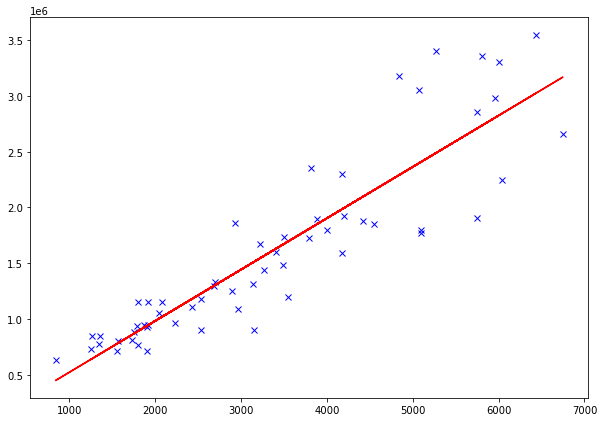

In [15]:
fig, ax = plt.subplots()
Y_pred=xc.dot(theta)
ax.plot(xc[:,1],yc,'x',color='Blue')
plt.plot(xc[:,1], Y_pred, color='red')
fig.set_size_inches(10, 7) 
plt.show()

## Gradient Decent:

### A first try: (only for one variable) 

In [16]:
m = 10000
c = 300
L = 0.00000003  # The learning Rate (Very Important)
n_iter=2  # The number of iterations to perform gradient descent
n = len(X)  # Number of elements in X 

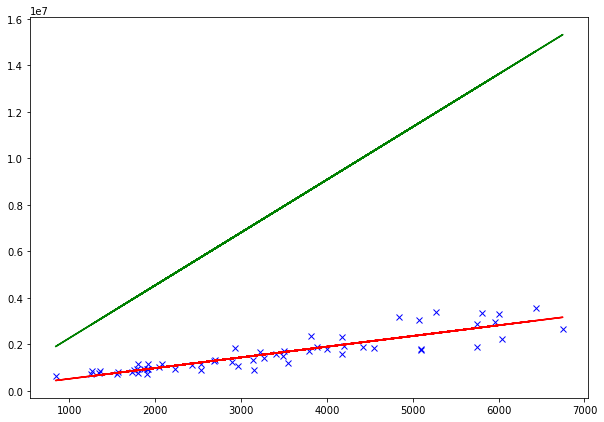

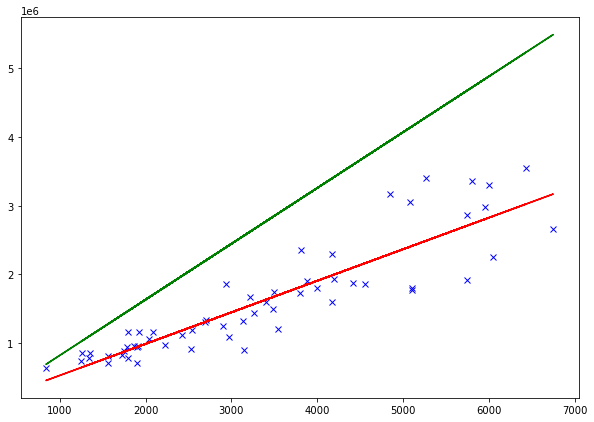

In [17]:
for i in range(n_iter): 
    Y_p = m*X + c  # The current predicted value of Y
    D_m = (2/n) * sum(X * (Y_p-Y))  # Derivative wrt m
    D_c = (2/n) * sum(Y_p-Y)  # Derivative wrt c
    m = (m - L * D_m)[0]   # Update m
    c = (c - L * D_c)[0]  # Update c
    
    
    #plt.scatter(X, Y,color='Blue')
    #plt.plot(X, Y_pred2, color='red') # predicted
    #plt.show()
    
    fig, ax = plt.subplots()
    Y_pred=xc.dot(theta)
    Y_pred2 = m*X + c
    ax.plot(xc[:,1],yc,'x',color='Blue') 
    plt.plot(xc[:,1], Y_pred, color='red') #by normal equation
    plt.plot(X, Y_pred2, 'g-') # predicted2
    fig.set_size_inches(10, 7) 
    plt.show()

In [18]:
xc

array([[1.000e+00, 2.969e+03],
       [1.000e+00, 1.566e+03],
       [1.000e+00, 2.532e+03],
       [1.000e+00, 6.748e+03],
       [1.000e+00, 4.200e+03],
       [1.000e+00, 2.232e+03],
       [1.000e+00, 1.344e+03],
       [1.000e+00, 2.898e+03],
       [1.000e+00, 1.729e+03],
       [1.000e+00, 3.149e+03],
       [1.000e+00, 4.000e+03],
       [1.000e+00, 6.430e+03],
       [1.000e+00, 1.750e+03],
       [1.000e+00, 8.400e+02],
       [1.000e+00, 2.428e+03],
       [1.000e+00, 3.222e+03],
       [1.000e+00, 1.869e+03],
       [1.000e+00, 1.904e+03],
       [1.000e+00, 3.795e+03],
       [1.000e+00, 3.262e+03],
       [1.000e+00, 3.499e+03],
       [1.000e+00, 5.100e+03],
       [1.000e+00, 5.804e+03],
       [1.000e+00, 4.418e+03],
       [1.000e+00, 1.352e+03],
       [1.000e+00, 1.248e+03],
       [1.000e+00, 1.260e+03],
       [1.000e+00, 2.044e+03],
       [1.000e+00, 3.814e+03],
       [1.000e+00, 1.795e+03],
       [1.000e+00, 1.787e+03],
       [1.000e+00, 1.561e+03],
       [

In [19]:
xc[:,1]

array([2969., 1566., 2532., 6748., 4200., 2232., 1344., 2898., 1729.,
       3149., 4000., 6430., 1750.,  840., 2428., 3222., 1869., 1904.,
       3795., 3262., 3499., 5100., 5804., 4418., 1352., 1248., 1260.,
       2044., 3814., 1795., 1787., 1561., 2084., 2699., 3883., 1905.,
       4553., 5745., 5743., 2932., 5269., 2688., 3138., 1912., 3487.,
       3548., 1920., 5955., 4845., 5100., 1800., 5075., 3405., 4176.,
       6042., 2536., 6000., 4173.])

### A better way: (Using vector notation)

In [20]:
def batch_gradient_descent(theta, x, y, alpha=0.1, n_iter=10000, print_cost=1000):
    """
    Implements batch gradient descent using vectors and numpy.
 
    Arguments:
        theta     : (n + 1)-dimensional vector
        x         : (m, n + 1)-dimension matrix
        y         : (m, 1)-dimension vector
        n_iter    : number of iterations to run
        alpha     : learning rate
        print_cost: # iterations to print cost
 
    Returns:
        theta after n_iter iterations
    """
    m = y.shape[0]
    n = theta.shape[0] - 1
 
    plot_data = []
 
    # Check the input dimensions to make sure they match our expectations
    assert(x.shape == (m, n + 1)), 'invalid shape for x' + str(x.shape)
    assert(y.shape == (m , 1)), 'invalid shape for y' + str(y.shape)
 
    # Feature scaling
    x_norm = np.sum(x, axis=0)
    x = x / x_norm
    # Perform the gradient descent update for the specified number of iterations
    cost_save = []
    for z in range(n_iter):
        h = np.dot(x, theta)
        theta = theta - alpha*(2/ m) * np.sum((h - y) * x, axis=0, keepdims=True).T 
 
        if (z % print_cost == 0):
            cost = 1 / (m) * np.sum((h - y) ** 2)
            plot_data.append([z, cost])
            print(cost)
            cost_save.append([cost])
    
        
        # Plot the linear funciton        
            fig, ax = plt.subplots() 
            ax.plot(xc[:,1],yc,'x',color='Blue') 
            plt.plot(xc[:,1], np.dot(x, theta), color='green') #  
            plt.plot(xc[:,1], Y_pred, color='red') #by normal equation
            plt.title(str(cost))
            fig.set_size_inches(10, 7) 
            plt.show()
 
    # Plot the cost function
    plot_x = [item[0] for item in plot_data]
    plot_y = [item[1] for item in plot_data]
    plt.plot(plot_x, plot_y, 'ro--')
 
    return theta, cost_save

In [21]:
theta0 = np.array([[0], [0]], dtype=np.float64)

3185231830818.983


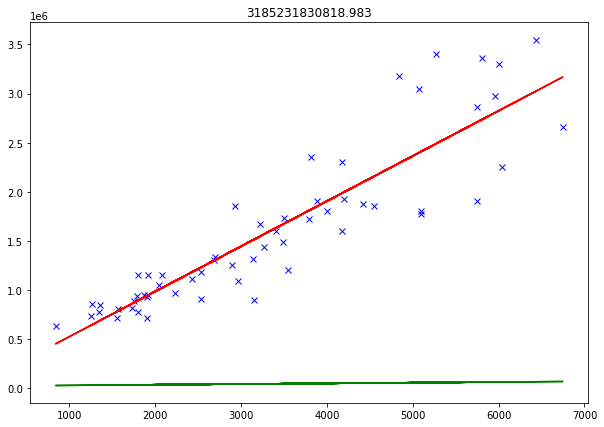

185321268570.99826


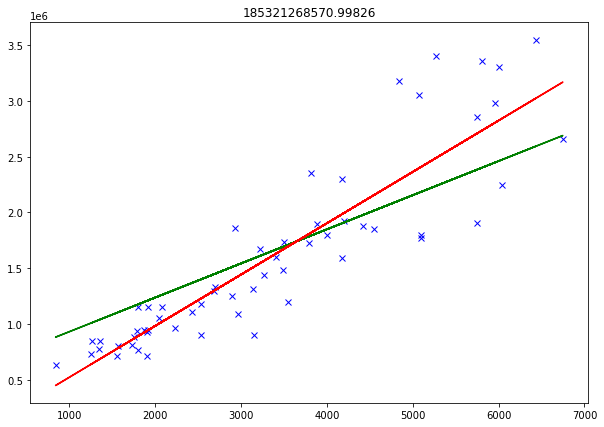

161674391575.8175


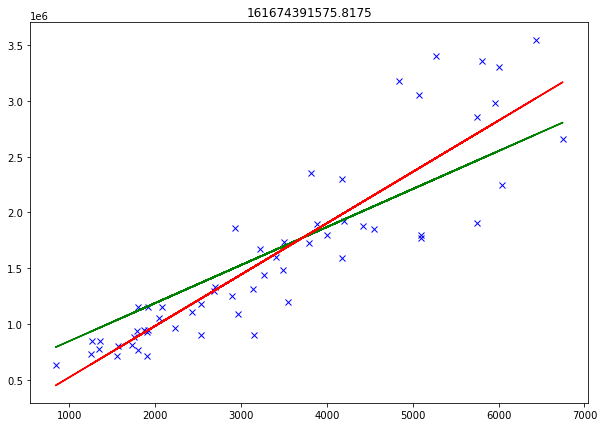

147304586619.65924


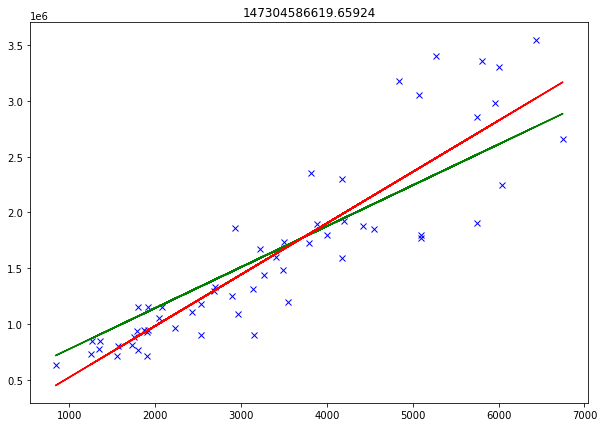

138531110540.2333


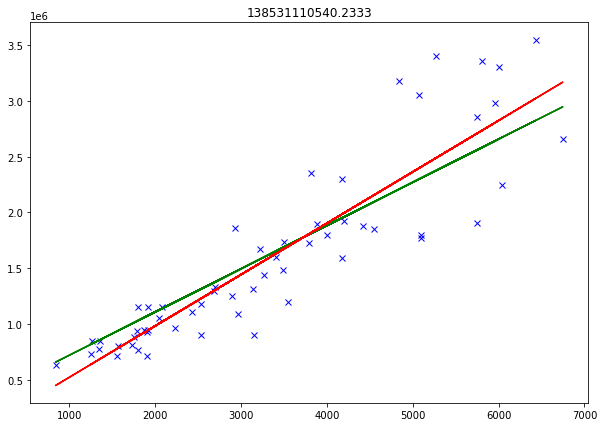

133174468258.1771


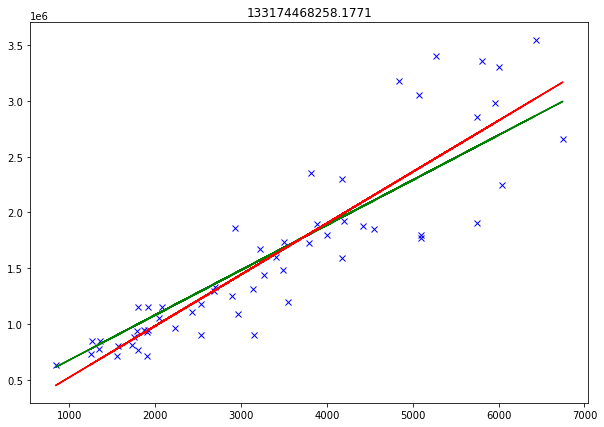

129903972473.07875


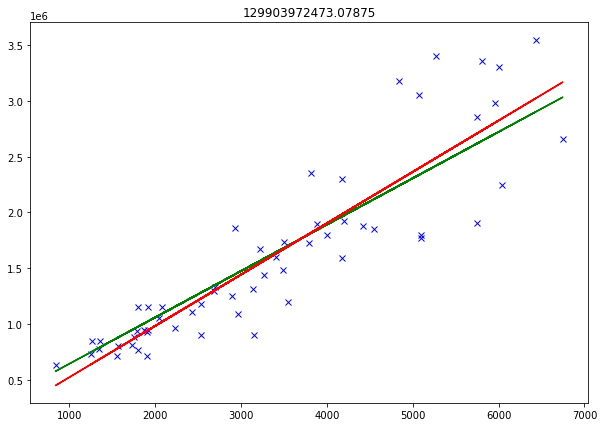

127907172590.403


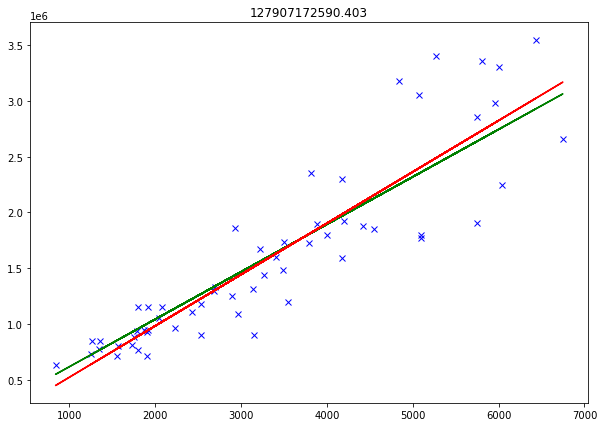

126688027227.29901


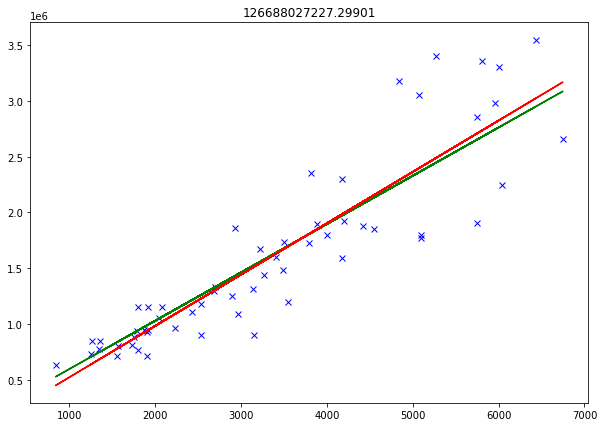

125943678517.50923


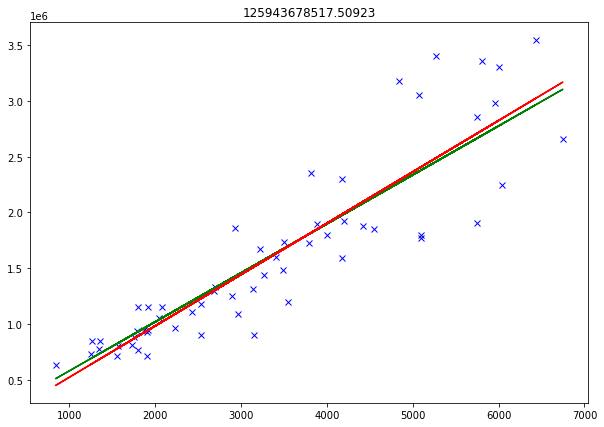

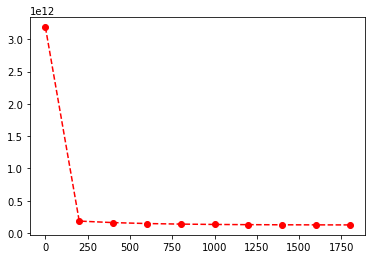

In [22]:
theta2, cost_save=batch_gradient_descent(theta0, xc, yc, alpha=20,n_iter=2000, print_cost=200)


In [23]:
print(theta2)
print(cost_save)

[[ 7180300.33646736]
 [85716140.8493941 ]]
[[3185231830818.983], [185321268570.99826], [161674391575.8175], [147304586619.65924], [138531110540.2333], [133174468258.1771], [129903972473.07875], [127907172590.403], [126688027227.29901], [125943678517.50923]]


### A third way (by matrix product)

In [24]:
eta = 0.001  # learning rate
n_iterations = 10
m = 1

theta = np.array([[0], [0]], dtype=np.float64)  #   initialization

for iteration in range(n_iterations):
    gradients = 2/m * xc.T.dot(xc.dot(theta) - yc)
    theta = theta-eta * gradients
theta

array([[-1.05768686e+61],
       [-4.29510961e+64]])

In [25]:
X_new = np.array([[0], [6900]])
X_new

array([[   0],
       [6900]])

In [26]:
X_new_b

NameError: name 'X_new_b' is not defined

In [ ]:
X_new = np.array([[0], [6900]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)
y_predict

In [ ]:
eta = 0.001  # learning rate
n_iterations = 10
m = 1

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(xc)
    plt.plot(X, yc, "bx")
    n_iterations = 20
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "g-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * xc.T.dot(xc.dot(theta) - yc)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x$", fontsize=18)
    plt.axis([0, 7000, 0, 5000000])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [ ]:
#np.random.seed(42)
#theta = np.random.randn(2,1)  # random initialization
theta = np.array([[0], [0]], dtype=np.float64) 

plt.figure(figsize=(16,5))
plt.subplot(131); plot_gradient_descent(theta, eta=0.000000001)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.00000001, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.0000001)

#save_fig("gradient_descent_plot")
plt.show()

## Stochastic Gradient Descent:

In [ ]:
theta_path_sgd = []
m = len(xc)
np.random.seed(42)
eta=0.00000001

In [27]:
X_new = np.array([[0], [6900]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)
y_predict

array([[-1.05768686e+61],
       [-2.96362574e+68]])

NameError: name 'theta_path_sgd' is not defined

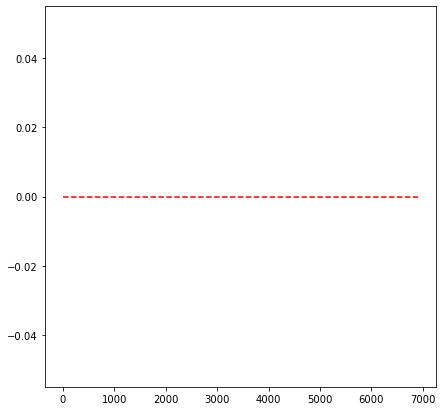

In [28]:
n_epochs = 50
t0, t1 = 0.0000005, 50  # learning schedule hyperparameters

theta = np.array([[0], [0]], dtype=np.float64) 

plt.figure(figsize=(7,7))

def learning_schedule(t):
    return t0 / (t + t1)

#theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    #  
            y_predict = X_new_b.dot(theta)           #  
            style = "g-" if i > 0 else "r--"         #    
            plt.plot(X_new, y_predict, style)        #  
        random_index = np.random.randint(m)
        xi = xc[random_index:random_index+1]
        yi = yc[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 #  

plt.plot(X, yc, "bx")                                 #  
plt.xlabel("$x$", fontsize=18)                     #  
plt.ylabel("$y$", rotation=0, fontsize=18)           #  
plt.axis([0, 7000, 0, 5000000])                              # 
#save_fig("sgd_plot")  #

plt.show()                                           #  

# Newton's Method

Question: Have a function $f(x)$. Want to find $x=a$ such that $f(x)=0$